# Proyek Klasifikasi Gambar: [Input Nama Dataset]
- **Nama:** Konstan Aftop Anewata Ndruru
- **Email:** konstanaftopn@gmail.com
- **ID Dicoding:** [Input Username]

## Import Semua Packages/Library yang Digunakan

In [1]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import cv2
import random
import numpy as np
from skimage import io, img_as_ubyte
from skimage.transform import rotate, AffineTransform, warp
from skimage.exposure import adjust_gamma

## Data Preparation

### Data Loading

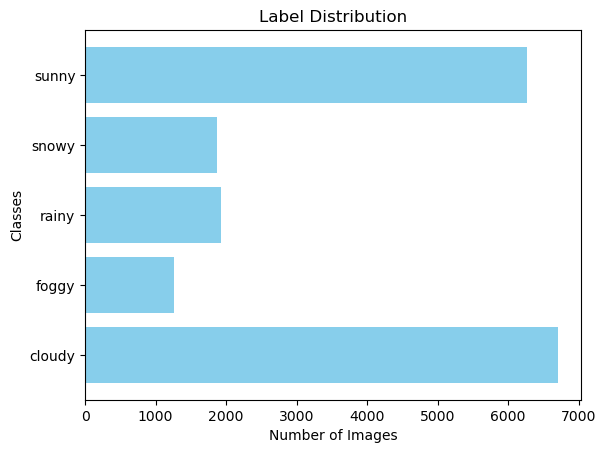

In [2]:
original_dataset_dir = 'data'

label_distribution = {}

for class_name in os.listdir(original_dataset_dir):
    class_dir = os.path.join(original_dataset_dir, class_name)
    if os.path.isdir(class_dir):
        num_images = len(os.listdir(class_dir))
        label_distribution[class_name] = num_images

classes = list(label_distribution.keys())
counts = list(label_distribution.values())

plt.barh(classes, counts, color='skyblue')
plt.xlabel('Number of Images')
plt.ylabel('Classes')
plt.title('Label Distribution')

plt.show()

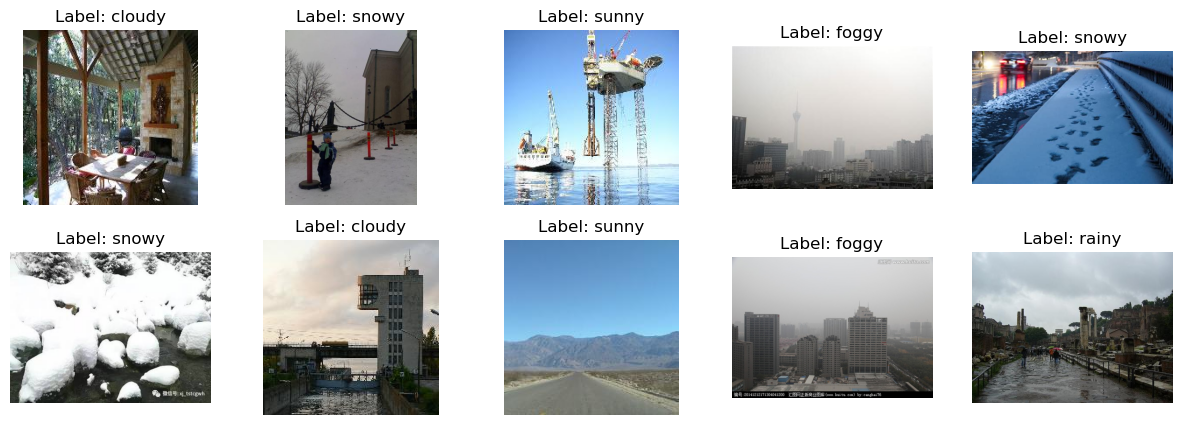

In [3]:
original_dataset_dir = 'data'

num_images_to_show = 10

image_paths = []

for class_name in os.listdir(original_dataset_dir):
    class_dir = os.path.join(original_dataset_dir, class_name)
    if os.path.isdir(class_dir):  
        images = os.listdir(class_dir)
        random_images = random.sample(images, min(num_images_to_show, len(images))) 
        for image in random_images:
            image_paths.append(os.path.join(class_dir, image))

random.shuffle(image_paths)


plt.figure(figsize=(15, 5)) 

for i, image_path in enumerate(image_paths[:num_images_to_show]):
    img = mpimg.imread(image_path)
    plt.subplot(2, 5, i+1) 
    plt.imshow(img)
    plt.title(f"Label: {image_path.split(os.sep)[-2]}") 
    plt.axis('off')

plt.show()


In [9]:
from PIL import Image
import os
 
def print_images_resolution(directory):
    unique_sizes = set()
    total_images = 0
 
    for subdir in os.listdir(directory):
        subdir_path = os.path.join(directory, subdir)
        image_files = os.listdir(subdir_path)
        num_images = len(image_files)
        print(f"{subdir}: {num_images}")
        total_images += num_images
 
        for img_file in image_files:
            img_path = os.path.join(subdir_path, img_file)
            with Image.open(img_path) as img:
                unique_sizes.add(img.size)

        for size in unique_sizes:
            print(f"- {size}")
        print("---------------")
 
    print(f"\nTotal: {total_images}")

print_images_resolution('data')

cloudy: 6702
- (500, 435)
- (160, 119)
- (474, 315)
- (500, 309)
- (500, 327)
- (287, 192)
- (500, 336)
- (250, 152)
- (474, 265)
- (268, 178)
- (260, 174)
- (272, 185)
- (284, 177)
- (261, 175)
- (520, 362)
- (500, 304)
- (500, 313)
- (600, 400)
- (323, 500)
- (272, 153)
- (474, 287)
- (285, 500)
- (474, 296)
- (352, 288)
- (364, 500)
- (342, 500)
- (353, 500)
- (1920, 1080)
- (275, 172)
- (851, 377)
- (500, 308)
- (224, 224)
- (276, 173)
- (474, 246)
- (474, 255)
- (550, 412)
- (225, 225)
- (268, 168)
- (245, 441)
- (241, 151)
- (241, 160)
- (474, 282)
- (305, 172)
- (282, 179)
- (274, 184)
- (242, 161)
- (1077, 1600)
- (500, 267)
- (255, 198)
- (420, 405)
- (500, 285)
- (334, 500)
- (468, 351)
- (474, 632)
- (500, 303)
- (256, 153)
- (245, 153)
- (640, 453)
- (474, 250)
- (500, 388)
- (474, 259)
- (720, 400)
- (500, 406)
- (474, 268)
- (332, 175)
- (474, 277)
- (230, 173)
- (317, 159)
- (302, 170)
- (211, 159)
- (267, 167)
- (500, 127)
- (256, 166)
- (500, 383)
- (500, 410)
- (900, 

In [ ]:
import os
import pandas as pd
from PIL import Image

dataset_dir = "data"

image_paths = []
labels = []

for label in os.listdir(dataset_dir):
    class_folder = os.path.join(dataset_dir, label)
    
    if os.path.isdir(class_folder):  
        for img_name in os.listdir(class_folder):
            img_path = os.path.join(class_folder, img_name)
            image_paths.append(img_path)
            labels.append(label)

df = pd.DataFrame({'image_path': image_paths, 'label': labels})


In [19]:
df['label'].value_counts()

label
cloudy    6702
sunny     6274
rainy     1927
snowy     1875
foggy     1261
Name: count, dtype: int64

### Data Preprocessing

#### Split Dataset

In [31]:
from sklearn.model_selection import train_test_split


df_train, df_test = train_test_split(df ,test_size=0.2,random_state=42)

In [44]:
datagen=ImageDataGenerator(rescale=1/255, validation_split= 0.2)
test_datagen= ImageDataGenerator(rescale=1/255)

train_gen=datagen.flow_from_dataframe(dataframe=df_train,
                                    x_col='image_path', y_col='label', subset='training', target_size=(224,224),class_mode='categorical',
                                    batch_size=32,shuffle=True)
val_gen=datagen.flow_from_dataframe(dataframe=df_train,
                                    x_col='image_path', y_col='label', subset='validation', target_size=(224,224),
                                    batch_size=32,class_mode='categorical', shuffle=True)
test_gen=test_datagen.flow_from_dataframe(dataframe=df_test, target_size=(224,224), class_mode='categorical',shuffle=False,
                                          x_col='image_path', y_col='label')

Found 11544 validated image filenames belonging to 5 classes.


c:\Users\konst\.conda\envs\waruds\lib\site-packages\keras\src\legacy\preprocessing\image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(


Found 2886 validated image filenames belonging to 5 classes.


c:\Users\konst\.conda\envs\waruds\lib\site-packages\keras\src\legacy\preprocessing\image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(


Found 3608 validated image filenames belonging to 5 classes.


## Modelling

In [42]:
from tensorflow.keras import layers, models

# Define the model
model = models.Sequential([
    layers.InputLayer(input_shape=(150, 150, 3)),  # Replace 'height' and 'width' with your image dimensions
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5, activation='softmax')  # Replace num_classes with the number of classes in your dataset
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # or 'categorical_crossentropy' depending on label format
              metrics=['accuracy'])
history = model.fit(
    train_gen,  # Training data
    epochs=10,  # Set number of epochs
    validation_data=val_gen,  # Validation data
    batch_size=64
)

c:\Users\konst\.conda\envs\waruds\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/10
361/361 ━━━━━━━━━━━━━━━━━━━━ 241s 664ms/step - accuracy: 0.5303 - loss: 1.2981 - val_accuracy: 0.6802 - val_loss: 0.8463
Epoch 2/10
361/361 ━━━━━━━━━━━━━━━━━━━━ 88s 244ms/step - accuracy: 0.6990 - loss: 0.7855 - val_accuracy: 0.6933 - val_loss: 0.7948
Epoch 3/10
361/361 ━━━━━━━━━━━━━━━━━━━━ 87s 241ms/step - accuracy: 0.7712 - loss: 0.6033 - val_accuracy: 0.7003 - val_loss: 0.8006
Epoch 4/10
361/361 ━━━━━━━━━━━━━━━━━━━━ 94s 260ms/step - accuracy: 0.8576 - loss: 0.3906 - val_accuracy: 0.6885 - val_loss: 0.9267
Epoch 5/10
361/361 ━━━━━━━━━━━━━━━━━━━━ 95s 263ms/step - accuracy: 0.9279 - loss: 0.2254 - val_accuracy: 0.6940 - val_loss: 1.1157
Epoch 6/10
361/361 ━━━━━━━━━━━━━━━━━━━━ 94s 261ms/step - accuracy: 0.9655 - loss: 0.1148 - val_accuracy: 0.7096 - val_loss: 1.2050
Epoch 7/10
361/361 ━━━━━━━━━━━━━━━━━━━━ 94s 262ms/step - accuracy: 0.9718 - loss: 0.0858 - val_accuracy: 0.6968 - val_loss: 1.4265
Epoch 8/10
361/361 ━━━━━━━━━━━━━━━━━━━━ 95s 263ms/step - accuracy: 0.9792 - loss: 

In [47]:
import tensorflow as tf
from tensorflow.keras import layers, models, losses
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
model_pretrained = Sequential()
model_pretrained.add(ResNet50(include_top=False, input_shape=(224, 224, 3), weights='imagenet'))
model_pretrained.layers[0].trainable = False
model_pretrained.add(Dense(256, activation='relu'))
model_pretrained.add(GlobalAveragePooling2D())
model_pretrained.add(Dropout(0.5))
model_pretrained.add(Dense(5, activation='softmax'))
model_pretrained.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
earlystop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)
learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_accuracy',
    patience=2,
    factor=0.5,
    min_lr=1e-5,
    verbose=1)

history2=model_pretrained.fit(train_gen, validation_data=val_gen, epochs=20, callbacks=[earlystop, learning_rate_reduction], verbose=1)

Epoch 1/20
 60/361 ━━━━━━━━━━━━━━━━━━━━ 5:36 1s/step - accuracy: 0.3307 - loss: 1.7109

KeyboardInterrupt: 

In [1]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[]


## Evaluasi dan Visualisasi

## Konversi Model

## Inference (Optional)